In [1]:
import tensorflow as tf

In [2]:
net = tf.keras.models.Sequential([
    # 卷积层：96 11*11 4 relu
    tf.keras.layers.Conv2D(filters=96, kernel_size=11,
                           strides=4, activation="relu"),
    # 池化：3*3 2
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    # 卷积：256 5*5 1 RELU same
    tf.keras.layers.Conv2D(filters=256, kernel_size=5,padding="same", activation="relu"),
    # 池化： 3*3 2
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    # 卷积：384 3*3 1 RELU same
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding="same", activation="relu"),
    # 卷积：384 3*3 1 RELU same
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding="same", activation="relu"),
    # 卷积：256 3*3 1 RELU same
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"),
    # 池化：3*3 2
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    # 展开
    tf.keras.layers.Flatten(),
    # 全连接层：4096 relu
    tf.keras.layers.Dense(1024, activation="relu"),
    # 随机失活
    tf.keras.layers.Dropout(0.5),
    # 全连接层：4096 relu
    tf.keras.layers.Dense(256, activation="relu"),
    # 随机失活
    tf.keras.layers.Dropout(0.5),
    # 输出层：
    tf.keras.layers.Dense(10, activation="softmax")

])

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [4]:
(train_images,train_label),(test_images,test_labels)=mnist.load_data()

In [5]:
train_images = np.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
test_images = np.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))
print(train_images.shape[0])
print(train_images.shape[1])
print(train_images.shape[2])
print(train_images.shape[3])
print(test_images.shape[0])
print(test_images.shape[1])
print(test_images.shape[2])
print(test_images.shape[3])

60000
28
28
1
10000
28
28
1


In [6]:
# 对训练数据进行抽样
def get_train(size):
    # 随机生成index
    index = np.random.randint(0,train_images.shape[0],size)
    # 选择图像并进行resize
    resized_image = tf.image.resize_with_pad(train_images[index],227,227)
    return resized_image.numpy(),train_label[index]

In [7]:
# 对测试数据进行抽样
def get_test(size):
    # 随机生成index
    index = np.random.randint(0,test_images.shape[0],size)
    # 选择图像并进行resize
    resized_image = tf.image.resize_with_pad(test_images[index],227,227)
    return resized_image.numpy(),test_labels[index]

In [8]:
# 抽样结果
train_images,train_label = get_train(256)
test_images,test_labels = get_test(128)

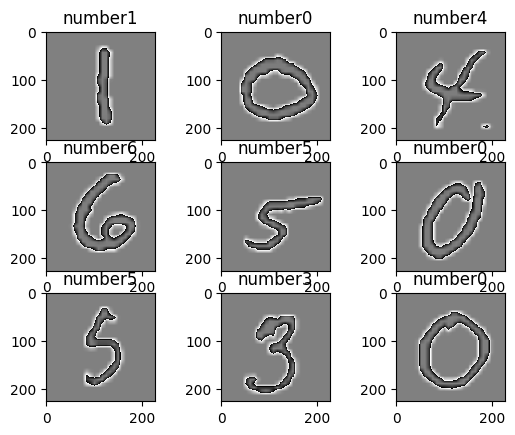

In [9]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(3,3,i+1)
# 以灰度图显示，不进行插值
    plt.imshow(train_images[i].astype(np.int8).squeeze(), cmap='gray',
interpolation='none')
# 设置图片的标题：对应的类别
    plt.title("number{}".format(train_label[i]))

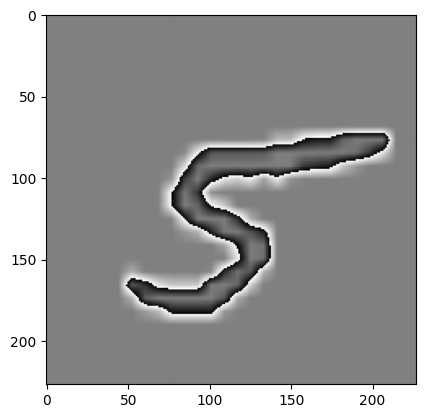

In [10]:
plt.imshow(train_images[4].astype(np.int8).squeeze(),cmap='gray')

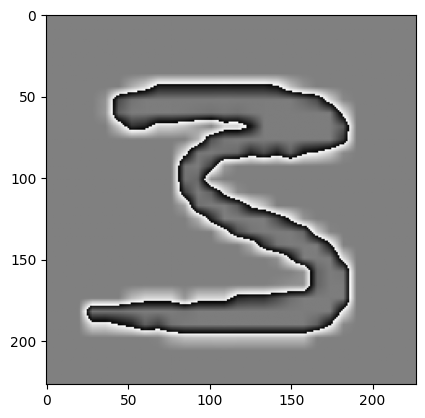

In [11]:
plt.imshow(train_images[67].astype(np.int8).squeeze(),cmap='gray')

In [12]:
net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [13]:
net.fit(train_images,train_label,batch_size=256,epochs=6,validation_split=0.05,verbose=1)

Epoch 1/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0823 - loss: 15.6683 - val_accuracy: 0.0000e+00 - val_loss: 92.4987
Epoch 2/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1235 - loss: 97.4049 - val_accuracy: 0.0769 - val_loss: 85.0157
Epoch 3/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0947 - loss: 261.2104 - val_accuracy: 0.0000e+00 - val_loss: 428.8812
Epoch 4/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0947 - loss: 509.2122 - val_accuracy: 0.0000e+00 - val_loss: 56085.4961
Epoch 5/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1193 - loss: 84991.2109 - val_accuracy: 0.1538 - val_loss: 66671352861425664.0000
Epoch 6/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1358 - loss: 117512985278152704.0000 - val_accuracy: 0.0769 - val_loss: nan


In [14]:
net.evaluate(test_images,test_labels,verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0469 - loss: nan


[nan, 0.0546875]